# Classification - Client subscription to Term Despoit

In [1]:
#import required packages
import pandas as pd
import numpy as np

In [2]:
#Data for classification is read into a dataframe and displayed first 30 records
df1 = pd.read_csv('classification.csv')
df1.head(30)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,999,blue-collar,married,basic.4y,unknown,no,yes,cellular,105.0,1,999.0,0,nonexistent,no
1,36,blue-collar,married,basic.6y,no,yes,no,cellular,125.0,5,999.0,0,nonexistent,no
2,999,admin.,single,high.school,no,no,yes,telephone,111.0,1,999.0,0,nonexistent,no
3,39,blue-collar,married,basic.6y,unknown,no,no,cellular,173.0,2,999.0,0,nonexistent,no
4,41,housemaid,married,basic.4y,unknown,no,no,cellular,107.0,1,999.0,0,nonexistent,no
5,35,admin.,single,professional.course,unknown,yes,no,telephone,352.0,4,999.0,0,nonexistent,no
6,999,technician,single,professional.course,no,yes,no,cellular,306.0,4,999.0,0,nonexistent,no
7,32,technician,divorced,high.school,no,no,no,cellular,50.0,1,999.0,0,nonexistent,no
8,25,technician,single,university.degree,no,no,no,cellular,216.0,2,999.0,0,nonexistent,no
9,32,admin.,married,university.degree,no,yes,yes,cellular,384.0,1,999.0,0,nonexistent,yes


# Data Exploration

In [3]:
#Total number of rows in the dataset
count_row = df1.shape[0]
count_row

#Rows in the data with missing values
row=sum(df1.isnull().values.any(axis=1))
row

#Percentage of missing records
per=row/count_row
per

#Number of columns with missing records
sum(df1.apply(lambda x: sum(x.isnull().values), axis = 0)>0)


3

In [7]:
#Count of missing values
count_nan1 = len(df1) - df1.count()
count_nan1

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
duration     112
campaign       0
pdays        161
previous       0
poutcome       0
y              0
dtype: int64

From the above data, we could observe that there are three columns with missing data(Marital, Duration and pdays)
There are two columns with inappropriate data- (age and pdays)
Age and pdays has few records with value as 999

# Data Pre Processing

Age: As it is continuous variable, replace the value '999' with NAN to be considered as missing value. Then replace all the missing values with mean of age column.

In [4]:
#Replace value 999 in age column entered as nan value
df1['age'] = df1['age'].replace(999,np.nan)
df1['age'].fillna((df1['age'].mean()), inplace=True)

Marital: Categorical column: Replace missing values with most occuring value 

In [5]:
#Find the mode of the data  for marital colum
df1.mode()['marital'][0]
#Replace missing values in marital column with mode
df1['marital'] = df1['marital'].replace(np.nan,'married')

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

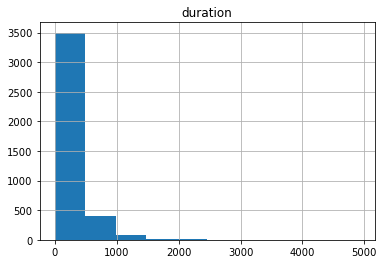

In [28]:
#Check the distribution of the data of duation column 
df1.hist(column='duration')

In [10]:
df1['duration'] = df1['duration'].fillna(df1['duration'].median())

In [8]:
#Transform pdays columns to binary - contacted and not contacted
df1['pdays'] = df1['pdays'].apply(lambda x: 'not-contacted' if x ==999 else 'contacted' if np.isnan(x)==False else x)
df1.pdays.value_counts()
df1.pdays.replace(np.nan,"not-contacted",inplace=True)
df1.pdays.unique()
df1.pdays.value_counts()
#map to values 0 - contacted and 1-not contacted
df1.pdays=df1["pdays"].map({"contacted":0,"not-contacted":1})

not-contacted    3963
contacted         156
Name: pdays, dtype: int64

In [ ]:
cols=pd.get_dummies(df1["job"],prefix="job")